<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [9]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [34]:
## importar el dataset 
df = pd.read_csv("weight_height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [35]:
## incluir columnas: Genero, Altura (cm) y Peso (kg)
df['Genero'] = df['Gender'].apply(lambda x: 'Masculino' if x == 'Male' else 'Femenino')
df['Altura (cm)'] = df['Height']/0.3937
df['Peso (kg)'] = df['Weight']*0.453
df

,Gender,Height,Weight,Genero,Altura (cm),Peso (kg)
0,Male,73.847017,241.893563,Masculino,187.571798,109.577784
1,Male,68.781904,162.310473,Masculino,174.706386,73.526644
2,Male,74.110105,212.740856,Masculino,188.240044,96.371608
3,Male,71.730978,220.042470,Masculino,182.197050,99.679239
4,Male,69.881796,206.349801,Masculino,177.500116,93.476460
...,...,...,...,...,...,...
9995,Female,66.172652,136.777454,Femenino,168.078873,61.960187
9996,Female,67.067155,170.867906,Femenino,170.350914,77.403161
9997,Female,63.867992,128.475319,Femenino,162.225025,58.199319
9998,Female,69.034243,163.852461,Femenino,175.347328,74.225165


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       10000 non-null  object 
 1   Height       10000 non-null  float64
 2   Weight       10000 non-null  float64
 3   Genero       10000 non-null  object 
 4   Altura (cm)  10000 non-null  float64
 5   Peso (kg)    10000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 468.9+ KB


In [ ]:
#  Conclusión de info():
# El datataframe no posee elementos nulos

In [32]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
des = df.describe()  # datos estadisticos
des.loc['Nan'] = df.isna().sum() # totalizar la cantidad de valores faltantes en el dataset
des.loc['%Nan'] = (df.isna().sum())*100 # % de valores faltantes en el dataset
des

,Height,Weight,Altura (cm),Peso (kg)
count,8.000000,8.000000,8.000000,8.000000
mean,2170.359137,2199.919598,2201.627355,2172.988009
std,3413.239676,3395.910943,3394.738603,3411.680514
min,3.847528,8.000000,8.000000,8.000000
25%,37.922187,74.417028,91.264918,34.804914
50%,961.519390,1044.153475,1039.831331,971.126127
75%,2284.185493,2311.439938,2311.198714,2286.922904
max,10000.000000,10000.000000,10000.000000,10000.000000
Nan,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

# El dataset no posee elementos ni columnas faltantes

In [37]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,Gender,Height,Weight,Genero,Altura (cm),Peso (kg)
0,Male,73.847017,241.893563,Masculino,187.571798,109.577784
1,Male,68.781904,162.310473,Masculino,174.706386,73.526644
2,Male,74.110105,212.740856,Masculino,188.240044,96.371608
3,Male,71.730978,220.042470,Masculino,182.197050,99.679239
4,Male,69.881796,206.349801,Masculino,177.500116,93.476460


In [84]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = df[['Genero', 'Altura (cm)', 'Peso (kg)']].copy()
df2

,Genero,Altura (cm),Peso (kg)
0,Masculino,187.571798,109.577784
1,Masculino,174.706386,73.526644
2,Masculino,188.240044,96.371608
3,Masculino,182.197050,99.679239
4,Masculino,177.500116,93.476460
...,...,...,...
9995,Femenino,168.078873,61.960187
9996,Femenino,170.350914,77.403161
9997,Femenino,162.225025,58.199319
9998,Femenino,175.347328,74.225165


In [85]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print('las filas para analizar son: ', df2.shape[0])
print('las columnas son: ', df2.shape[1])

las filas para analizar son:  10000
las columnas son:  3


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

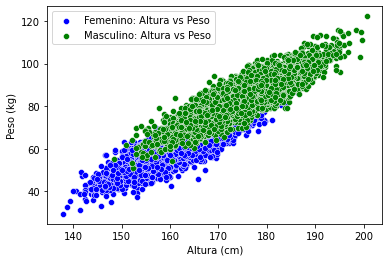

In [163]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
# Filtro
df_femenino = df2[df2['Genero'] == 'Femenino']     # utiliza operador lógico ==
df_masculino = df2[df2['Genero'] == 'Masculino']
# Scatter
sns.scatterplot(x=df_femenino['Altura (cm)'], y=df_femenino['Peso (kg)'], color='b', label='Femenino: Altura vs Peso')
sns.scatterplot(x=df_masculino['Altura (cm)'], y=df_masculino['Peso (kg)'], color='g', label='Masculino: Altura vs Peso')
plt.show()

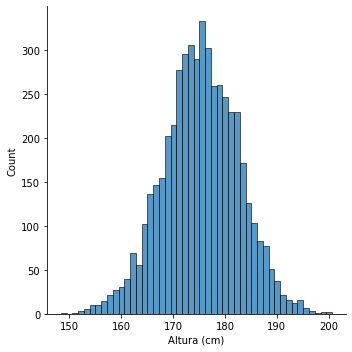

El valor medio es:  175.32726925633074


In [164]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
sns.displot(df_masculino['Altura (cm)'])
plt.show()
print('El valor medio es: ', df_masculino['Altura (cm)'].mean())

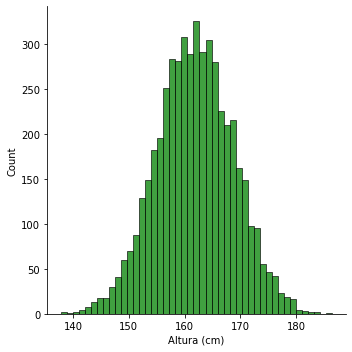

El valor medio es:  161.82060859391686


In [124]:
# Alumno: Dibujar la distribucion (histograma) de la altura en mujeres
# Además, imprimir en pantalla el valor medio
sns.displot(df_femenino['Altura (cm)'], color="g")
plt.show()
print('El valor medio es: ', df_femenino['Altura (cm)'].mean())

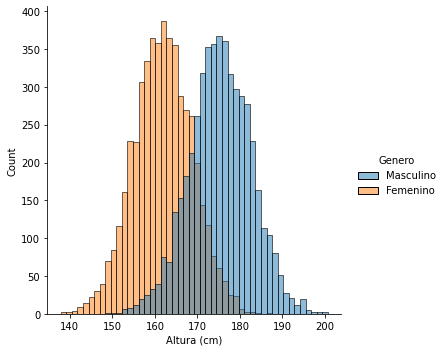

In [165]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data=df2, x="Altura (cm)", hue="Genero")
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [171]:
# Obtener datos para x e y (femenino)
X_f = df_femenino[['Altura (cm)']].values       # array femenino
y_f = df_femenino[['Peso (kg)']].values         # array femenino

# Obtener datos para x e y (masculino)
X_m = df_masculino[['Altura (cm)']].values       # array masculino
y_m = df_masculino[['Peso (kg)']].values         # array masculino

In [172]:
# dividir datos en train y test

from sklearn.model_selection import train_test_split

# dividir en test y train (femenino)
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size=0.3, random_state=42)

# dividir en test y train (masculino)
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.3, random_state=42)

In [173]:
# Entrenar modelo de regresión lineal
from sklearn import linear_model

lr = linear_model.LinearRegression()
# femenino
lr.fit(X_f_train, y_f_train)      # entrenando
y_f_hat = lr.predict(X_f_test)

# masculino
lr.fit(X_m_train, y_m_train)      # entrenando
y_m_hat = lr.predict(X_m_test)


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [174]:
# Calcular métrica r2_score del modelo (y_hat vs y_test)
from sklearn.metrics import r2_score

# femenino
value_f = r2_score(y_f_test, y_f_hat)

# masculino
value_m = r2_score(y_m_test, y_m_hat)

print(f"Coeficiente de determinacion: Femenino:", value_f, "Masculino : ", value_m)

Coeficiente de determinacion: Femenino: 0.7301914495397975 Masculino :  0.7471339794726173


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

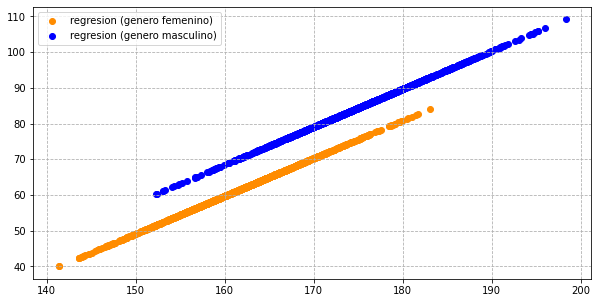

In [175]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.scatter(X_f_test, y_f_hat, color='darkOrange', label='regresion (genero femenino)')
ax.scatter(X_m_test, y_m_hat, color='blue', label='regresion (genero masculino)')
ax.grid(ls='dashed')
ax.legend()
plt.show()
